In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder


data=pd.read_csv("diamonds.csv")

In [2]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Text(0, 0.5, 'price')

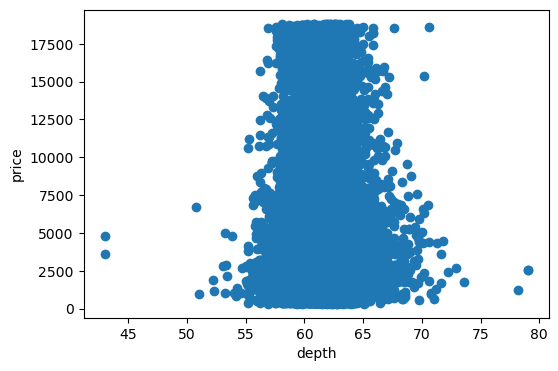

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(x="depth",y="price",data=data)
plt.xlabel("depth")
plt.ylabel("price")

<Axes: xlabel='color', ylabel='count'>

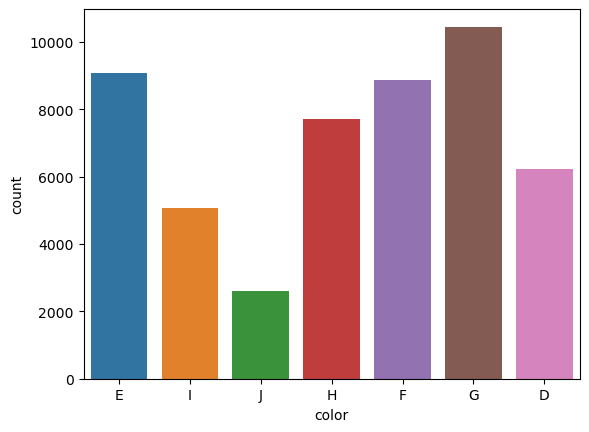

In [5]:
sns.countplot(x="color",data=data)

<Axes: xlabel='cut', ylabel='count'>

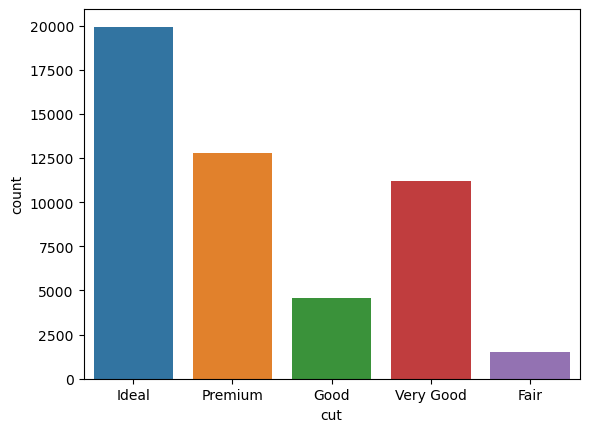

In [6]:
sns.countplot(x="cut",data=data)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [8]:
data['cut'].unique()


array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [10]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [11]:
le=LabelEncoder()
data['cut']=le.fit_transform(data['cut'])
data['color']=le.fit_transform(data['color'])
data['clarity']=le.fit_transform(data['clarity'])


In [12]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  int32  
 2   color    50000 non-null  int32  
 3   clarity  50000 non-null  int32  
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.2 MB


In [14]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [15]:
data=sklearn.utils.shuffle(data)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
13969,1.25,2,6,7,61.1,57.0,6084,6.94,6.91,4.23
49678,0.71,2,6,2,60.6,57.0,2700,5.78,5.83,3.52
7607,0.90,4,0,2,59.4,62.0,4381,6.19,6.24,3.69
22779,2.08,3,3,3,62.2,60.0,12883,8.16,8.09,5.06
14218,1.06,4,1,2,59.8,56.0,6169,6.63,6.67,3.98


In [16]:
X=data.drop('price',axis=1).values
y=data['price'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set : ",X_train.shape,y_train.shape)
print("Test set : ",X_test.shape,y_test.shape)


Train set :  (40000, 9) (40000,)
Test set :  (10000, 9) (10000,)


In [19]:
clf = svm.SVR(kernel="linear")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7856376284310649